# NBA Project Data Analysis
Notebook 2

## Purpose
This notebook aims to perform a detailed analysis of NBA regular season game attendance, focusing on various trends and factors that influence attendance figures. The analysis is divided into two main parts:

1. **Time Series Analysis:** Investigating how attendance changes over time, both within a single season and across multiple seasons.
2. **Comparative Analysis:** Examining how game attendance varies depending on the day of the week.

The goal is to uncover patterns in attendance data, providing insights into factors that might drive or influence fan engagement during the regular season. By focusing on data post-2000, the analysis reflects more current trends, accounting for changes in stadium capacities and other relevant factors.

## Table of Contents
  - [Setup](#setup)
  - [Data Analysis](#data-analysis)
    - [Visualizing Attendance Data](#visualizing-attendance-data)
      - [Over Multiple Seasons](#attendance-over-multiple-seasons)
      - [Over a Season](#attendance-over-a-season)
      - [By Day of the Week](#attendance-by-day-of-the-week)

## Setup

In [1]:
# Package Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from scipy import stats

In [2]:
# Specify the directory where you want to save the visuals
save_dir = '../Visuals'
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist 

In [3]:
# Read combined NBA data saved from previous notebook
combined_df = pd.read_csv('data/combined_data.csv')

## Data Analysis
NBA Regular Season Game Attendance Analysis
- Time Series Analysis: 
    - How attendance changes over time (over a season or multiple seasons).
- Comparative Analysis: 
    - How attendance changes based on which day of the week a game is played on


Note: I choose to only look at games after 2000 because the data set does not take into account stadium or capacity changes over a teams history. More recent games would be more reflective of current capacity figures from the data set. 

In [4]:
# Filtering the data set for regular season games
regular_season_df = combined_df[combined_df['season_type'] == 'Regular Season']

Note: Dataset was missing 2012 regular season attendance figures

### Visualizing Attendance Data

#### Attendance over Multiple Seasons
- Annual attendance totals since 2001
- Average game attendance by season

##### Line Chart - Regular Season Attendance (Post 2000)

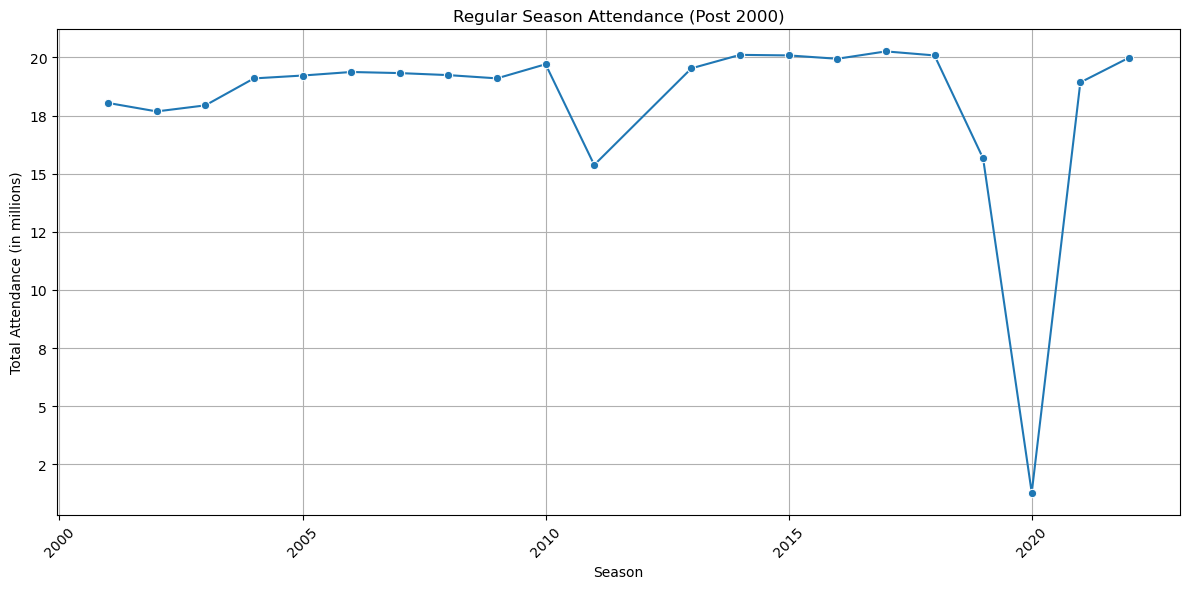

In [5]:
# Filter data to only include seasons after 2000
filtered_df = regular_season_df[(regular_season_df['season'] > 2000)]

# Group by season to calculate the total attendance per season
attendance_per_season = filtered_df.groupby('season')['attendance'].sum().reset_index()

# Plotting the attendance over the years using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_per_season, x='season', y='attendance', marker='o')

# Update the y-axis to display values in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x*1e-6:.0f}'))

plt.title('Regular Season Attendance (Post 2000)')
plt.xlabel('Season')
plt.ylabel('Total Attendance (in millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(save_dir, 'attendance_per_season.png'))

# Show the plot
plt.show()

Game attendance has stayed steady with certain years being notable exceptions
- 2012 attendance data was missing
- 2011 NBA season was shortened due to a CBA (Collective Bargaining Agreement) dispute between the players and team owners resulting in a lockout
- 2019 NBA season was postponed due to COVID. Games were later resumed with empty stadiums.
- 2020 NBA season similarly featured games with no in person attendance due to COVID protocols 

##### Line Chart with Trend Line - Average Game Attendance per Season
Post 2000 excluding lockout and covid affected seasons

In [6]:
# Filter data to exclude certain seasons
filtered_df = regular_season_df[
    (regular_season_df['season'] > 2000) &
    (regular_season_df['season'] != 2019) &
    (regular_season_df['season'] != 2020) &
    (regular_season_df['season'] != 2021) &
    (regular_season_df['season'] != 2012)
]

In [7]:
# Filter out games with no attendance data
valid_attendance_df = filtered_df.dropna(subset=['attendance'])

# Group by season to calculate total attendance and number of games
attendance_summary = valid_attendance_df.groupby('season').agg(
    total_attendance=('attendance', 'sum'),
    games_with_attendance=('attendance', 'count')
).reset_index()

# Calculate the average attendance per game
attendance_summary['average_attendance_per_game'] = attendance_summary['total_attendance'] / attendance_summary['games_with_attendance']

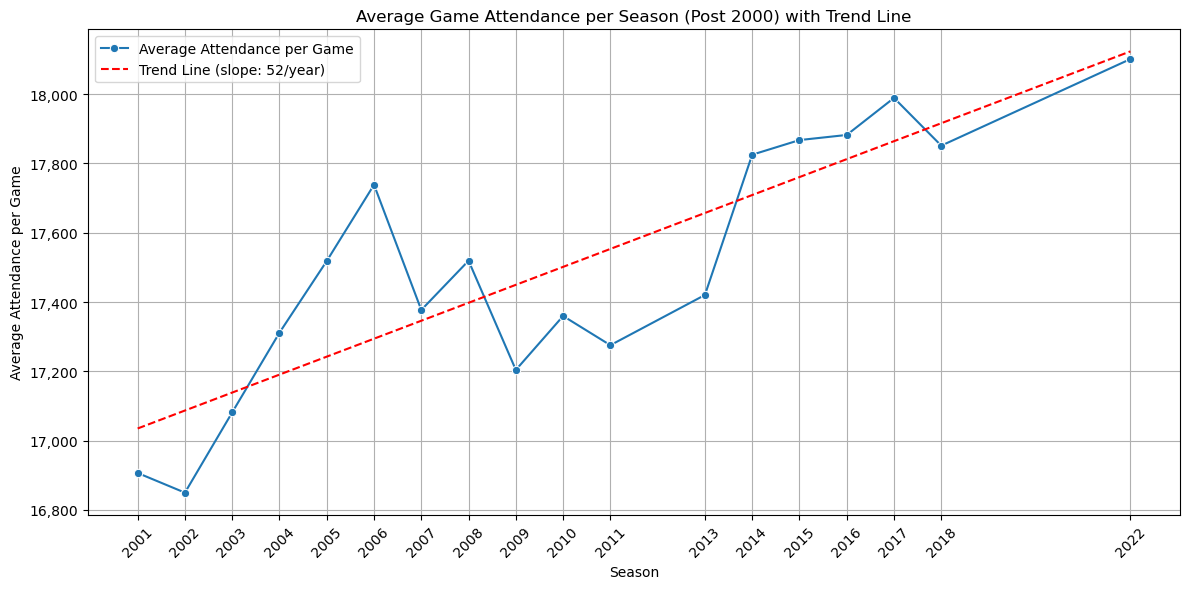

In [8]:
# Calculate the trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(attendance_summary['season'], attendance_summary['average_attendance_per_game'])

# Create a line of best fit
attendance_summary['trendline'] = intercept + slope * attendance_summary['season']

# Plotting the average attendance per game over the years with a trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=attendance_summary, x='season', y='average_attendance_per_game', marker='o', label='Average Attendance per Game')

# Add the trend line to the plot
sns.lineplot(data=attendance_summary, x='season', y='trendline', color='red', linestyle='--', label=f'Trend Line (slope: {slope:.0f}/year)')

# Set the x-ticks to be exactly the seasons available in the data
plt.xticks(attendance_summary['season'])

# Update the y-axis to use commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title('Average Game Attendance per Season (Post 2000) with Trend Line')
plt.xlabel('Season')
plt.ylabel('Average Attendance per Game')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(save_dir, 'attendance_per_game.png'))

# Show the plot
plt.show()

The slope of the trend line in your graph represents the average change in the average game attendance per season—over time.<br> Specifically:

- **Slope Value (52/year):** This means that, on average, the game attendance increases by 52 people per season. 
  
**Overall Trend:** Over the course of many years, even a small annual increase can lead to a significant overall growth in attendance. For instance, over 10 years, this would mean an increase of around 500 attendees per game on average.

**Implications:** This upward trend might reflect growing popularity, improvements in the game experience, or other factors that draw more spectators each year.


#### Attendance over a Season
- Total number of games played each month
- Average game attendance by month

Note: Using filtered data from earlier that excludes lockout and COVID affected seasons

In [9]:
# Filtering out games with no attendance data
filtered_df = filtered_df.dropna(subset=['attendance'])

In [10]:
# Since the 'month' column in our data set already contains numerical representations of the months,
# I'll map those numbers to their respective month names for clarity.

# Mapping numerical months to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

filtered_df.loc[:, 'month_name'] = filtered_df['month'].map(month_mapping)

 ##### Bar Chart - Distribution of Games over a Season

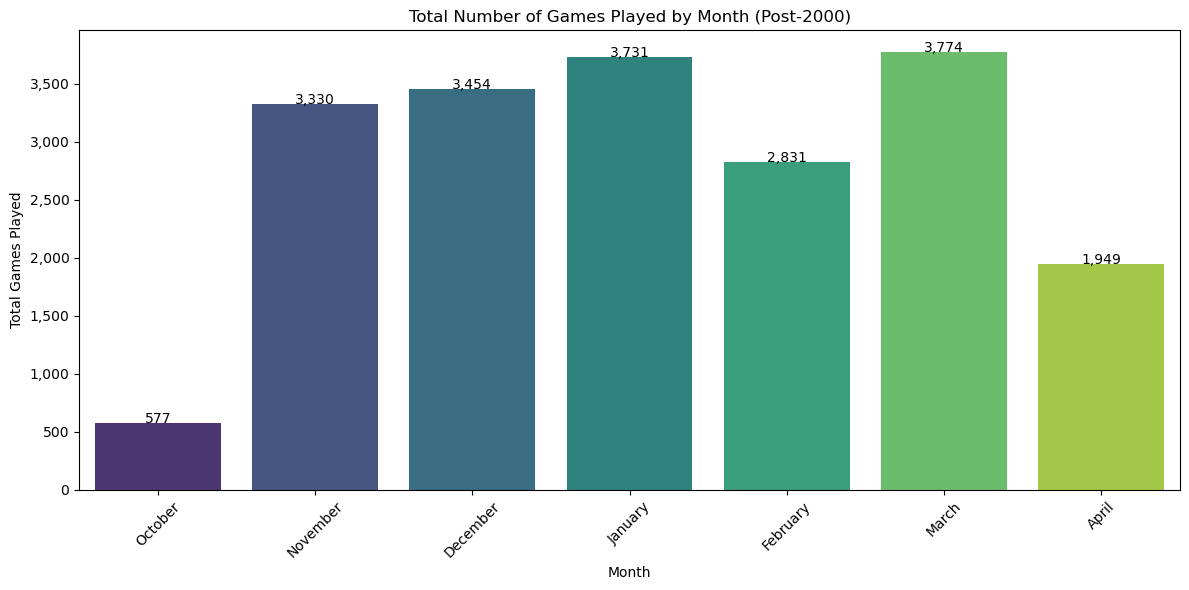

In [11]:
# Calculate the total number of games played in each month
# Adjust the reindexing to start from October and exclude months outside the regular season
games_by_month = filtered_df['month_name'].value_counts().reindex(
    ['October', 'November', 'December', 'January', 'February', 'March', 'April']
).reset_index()
games_by_month.columns = ['month_name', 'total_games']

# Plotting the total number of games by month
plt.figure(figsize=(12, 6))
games_plot = sns.barplot(data=games_by_month, x='month_name', y='total_games', hue='month_name', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Hide the legend

# Adding the total games value on top of each bar
for index, row in games_by_month.iterrows():
    games_plot.text(index, row['total_games'], f'{int(row["total_games"]):,}', color='black', ha="center")

# Update the y-axis to use commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title('Total Number of Games Played by Month (Post-2000)')
plt.xlabel('Month')
plt.ylabel('Total Games Played')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(save_dir, 'games_per_month.png'))

# Show the plot
plt.show()

 ##### Bar Chart - Average game attendance by month

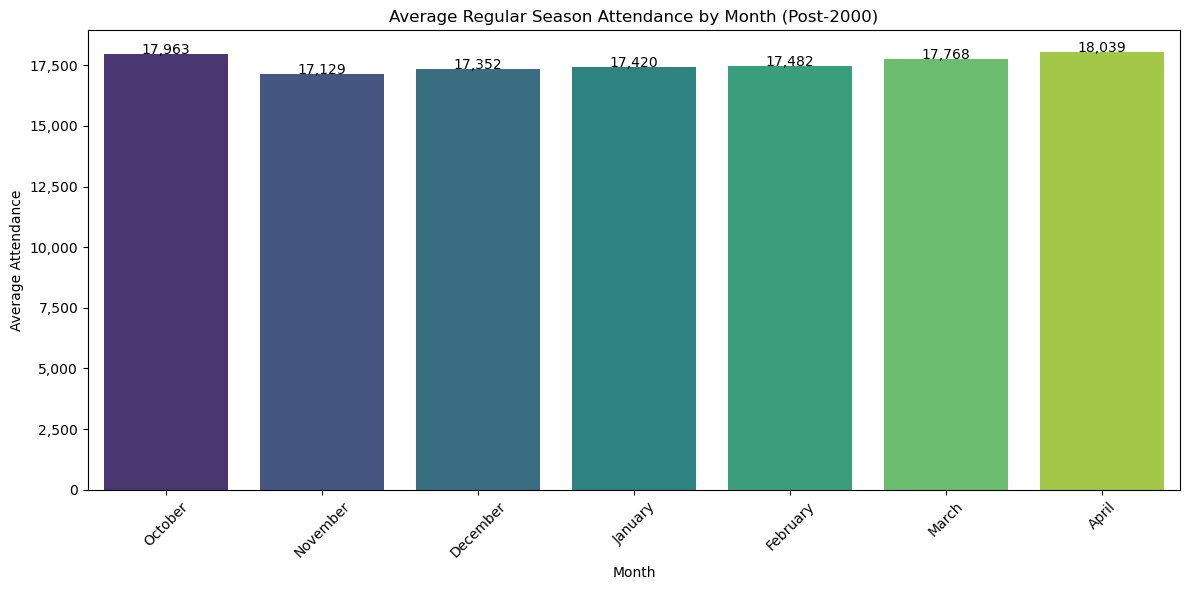

In [12]:
# Group by month name to calculate average attendance
# Adjust the reindexing to start from October and exclude months outside the regular season
attendance_by_month = filtered_df.groupby('month_name')['attendance'].mean().reindex(
    ['October', 'November', 'December', 'January', 'February', 'March', 'April']
).reset_index()

# Plotting the average attendance by month, starting from October
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=attendance_by_month, x='month_name', y='attendance', hue='month_name', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Hide the legend

# Adding the approximate value on top of each bar
for index, row in attendance_by_month.iterrows():
    bar_plot.text(index, row['attendance'], f'{int(row["attendance"]):,}', color='black', ha="center")

# Update the y-axis to use commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title('Average Regular Season Attendance by Month (Post-2000)')
plt.xlabel('Month')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig(os.path.join(save_dir, 'attendance_per_month.png'))

# Show the plot
plt.show()

#### Attendance by Day of the Week
- Total number of games played by day of the week
- Average game attendance over a week

Note: Using filtered data from earlier that excludes lockout and COVID affected seasons

 ##### Bar Chart - Distribution of Games over a Week

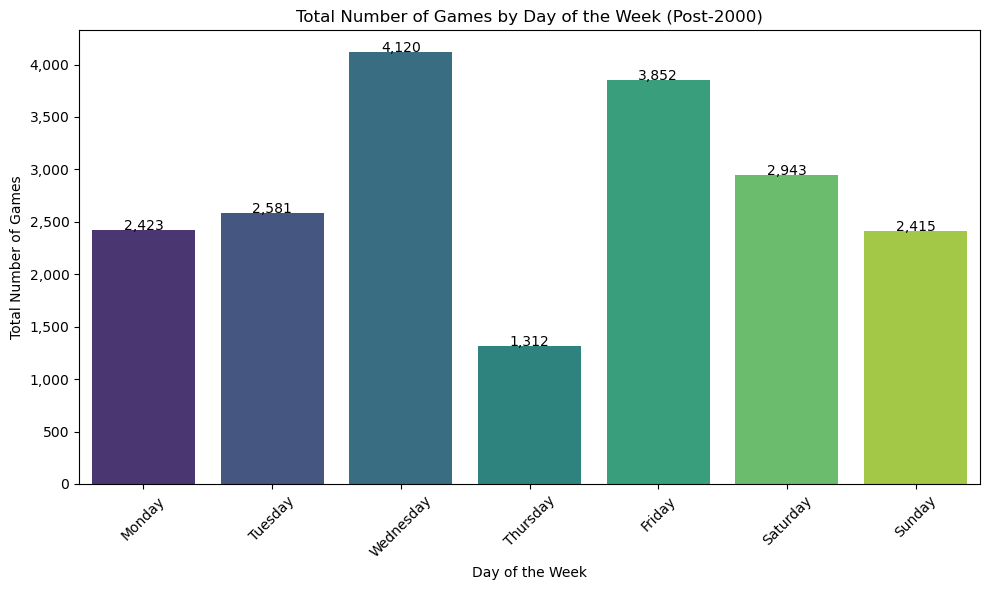

In [13]:
# Calculate the total number of games played on each day of the week
games_by_day = filtered_df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
games_by_day.columns = ['day_of_week', 'total_games']

# Plotting the total number of games by day of the week
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=games_by_day, x='day_of_week', y='total_games', hue='day_of_week', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Hide the legend

# Adding the approximate value on top of each bar
for index, row in games_by_day.iterrows():
    bar_plot.text(index, row['total_games'], f'{int(row["total_games"]):,}', color='black', ha="center")

# Update the y-axis to use commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title('Total Number of Games by Day of the Week (Post-2000)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(save_dir, 'total_games_by_day.png'))

# Show the plot
plt.show()

 ##### Bar Chart - Attendance by Day of the Week

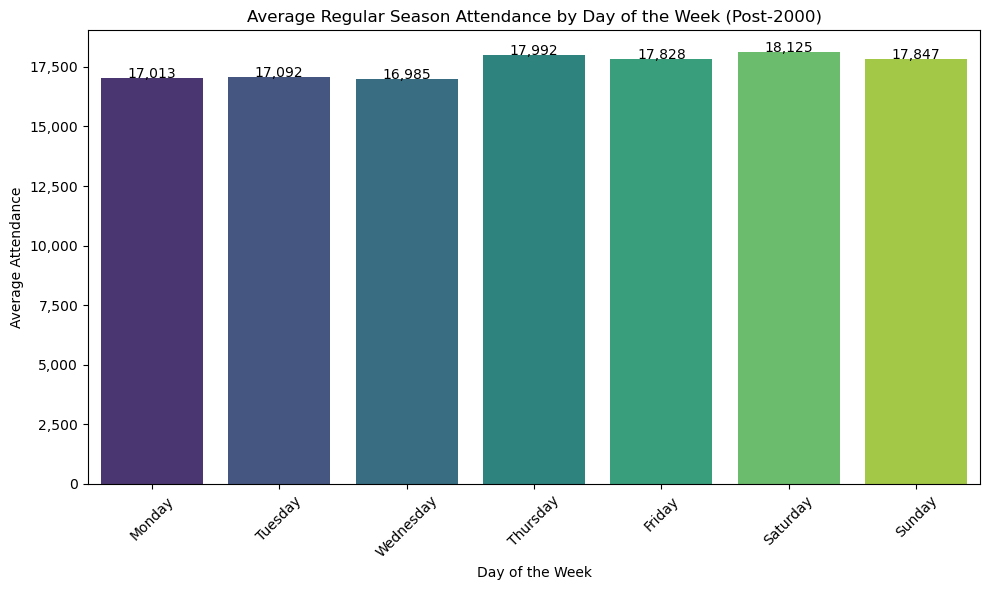

In [14]:
# Group by day of the week to calculate average attendance
attendance_by_day = filtered_df.groupby('day_of_week')['attendance'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Plotting the average attendance by day of the week
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=attendance_by_day, x='day_of_week', y='attendance', hue='day_of_week', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Hide the legend

# Adding the approximate value on top of each bar
for index, row in attendance_by_day.iterrows():
    bar_plot.text(index, row['attendance'], f'{int(row["attendance"]):,}', color='black', ha="center")

# Update the y-axis to use commas for thousands separators
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.title('Average Regular Season Attendance by Day of the Week (Post-2000)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(save_dir, 'attendance_by_day.png'))

# Show the plot
plt.show()